In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import matplotlib.ticker as mtick

import glob

In [2]:
import world_bank_data as wb

pop = pd.DataFrame(wb.get_series('SP.POP.TOTL', mrv=1))

In [3]:
pop = pop.reset_index()
# pop[pop['Country'] == "France"]

In [4]:
df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv', \
                 parse_dates=True)

In [5]:
df = df[df['Province/State'] != 'Diamond Princess']
df = df[df['Province/State'] != 'Grand Princess']

In [6]:
df = df.groupby('Country/Region').sum()

In [7]:
df = df.T

In [8]:
df = df.drop('Lat')
df = df.drop('Long')

In [9]:
df = df.rename(columns={"US": "United States"}, errors="raise")
df.columns

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       ...
       'Turkey', 'United States', 'Ukraine', 'United Arab Emirates',
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'occupied Palestinian territory'],
      dtype='object', name='Country/Region', length=155)

In [10]:
df.index = pd.to_datetime(df.index)

In [11]:
df.index.name = 'Date'

In [12]:
# df.diff()

In [13]:
today = df.iloc[-1]

In [14]:
print(today[(today >= 100) & (today < 1000)].index)
print(today[(today >= 1000) & (today < 10000)].index)
print(today[(today >= 10000)].index)

Index(['Australia', 'Bahrain', 'Brazil', 'Canada', 'Chile', 'Czechia',
       'Denmark', 'Egypt', 'Estonia', 'Finland', 'Greece', 'Iceland', 'India',
       'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Japan', 'Kuwait', 'Malaysia',
       'Pakistan', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania',
       'San Marino', 'Saudi Arabia', 'Singapore', 'Slovenia', 'Thailand'],
      dtype='object', name='Country/Region')
Index(['Austria', 'Belgium', 'France', 'Germany', 'Korea, South',
       'Netherlands', 'Norway', 'Spain', 'Sweden', 'Switzerland',
       'United States', 'United Kingdom'],
      dtype='object', name='Country/Region')
Index(['China', 'Iran', 'Italy'], dtype='object', name='Country/Region')


In [15]:
condition = today[(today >= 1000)].index
print(condition)

Index(['Austria', 'Belgium', 'China', 'France', 'Germany', 'Iran', 'Italy',
       'Korea, South', 'Netherlands', 'Norway', 'Spain', 'Sweden',
       'Switzerland', 'United States', 'United Kingdom'],
      dtype='object', name='Country/Region')


In [16]:
countries = ['Austria', 'Belgium', 'France', 'Germany', 'Italy',
             'Netherlands', 'Norway', 'Spain', 'Sweden',
             'Switzerland', 'United States', 'United Kingdom', 'Canada']
min_case_num = 100
title_name = "countries with cases >1k excl. China, Iran & S. Korea, incl. Canada"

In [17]:
data = {}
data_original = {}

for c in countries:
    country = df[c]
    countrt100 = country[country >= min_case_num]
    
    countrt100 = countrt100.reset_index()
    countrt100 = countrt100[c]
    
    data[c] = countrt100
    data_original[c] = df[c]

In [18]:
print("Average growth rate of total # of confirmed cases in Past 5 Days")
print("---------------")

for c in countries:
    growth_rate = data[c].tail(5).pct_change().mean()
    num_cases = data[c].iloc[-1]
    
    print(c)
    print(round(growth_rate * 100, 2),'%')
    print('today:', int(num_cases),'cases')
    print('7 days later (projected):', int(num_cases*(1+growth_rate)**7),'cases')
    print('---')

Average growth rate of total # of confirmed cases in Past 5 Days
---------------
Austria
36.63 %
today: 1018 cases
7 days later (projected): 9048 cases
---
Belgium
37.32 %
today: 1058 cases
7 days later (projected): 9742 cases
---
France
32.63 %
today: 6650 cases
7 days later (projected): 48003 cases
---
Germany
38.37 %
today: 7272 cases
7 days later (projected): 70634 cases
---
Italy
22.89 %
today: 27980 cases
7 days later (projected): 118405 cases
---
Netherlands
30.51 %
today: 1414 cases
7 days later (projected): 9120 cases
---
Norway
18.13 %
today: 1333 cases
7 days later (projected): 4278 cases
---
Spain
50.36 %
today: 9942 cases
7 days later (projected): 172738 cases
---
Sweden
17.06 %
today: 1103 cases
7 days later (projected): 3321 cases
---
Switzerland
38.97 %
today: 2200 cases
7 days later (projected): 22026 cases
---
United States
30.08 %
today: 4565 cases
7 days later (projected): 28765 cases
---
United Kingdom
38.23 %
today: 1551 cases
7 days later (projected): 14955 cases

In [19]:
# growth_rate = data['Spain'].diff().replace(0, np.nan).dropna().tail(10).pct_change().mean()
# growth_rate

Text(0.5, 0, 'Days after passing 100 confirmed cases')

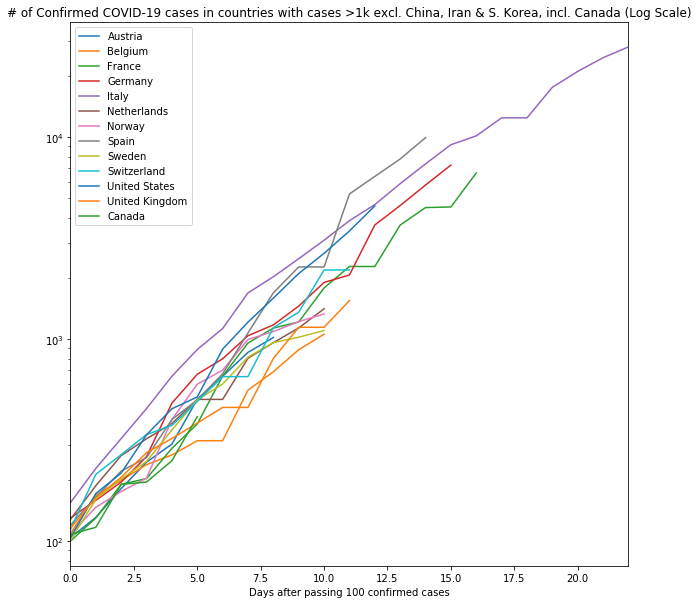

In [20]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for c in data.keys():
    data[c].plot(logy=True)

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in " + title_name + " (Log Scale)")
axes.set_xlabel("Days after passing " + str(min_case_num) + " confirmed cases")

Text(0.5, 0, 'Days after passing 100 confirmed cases')

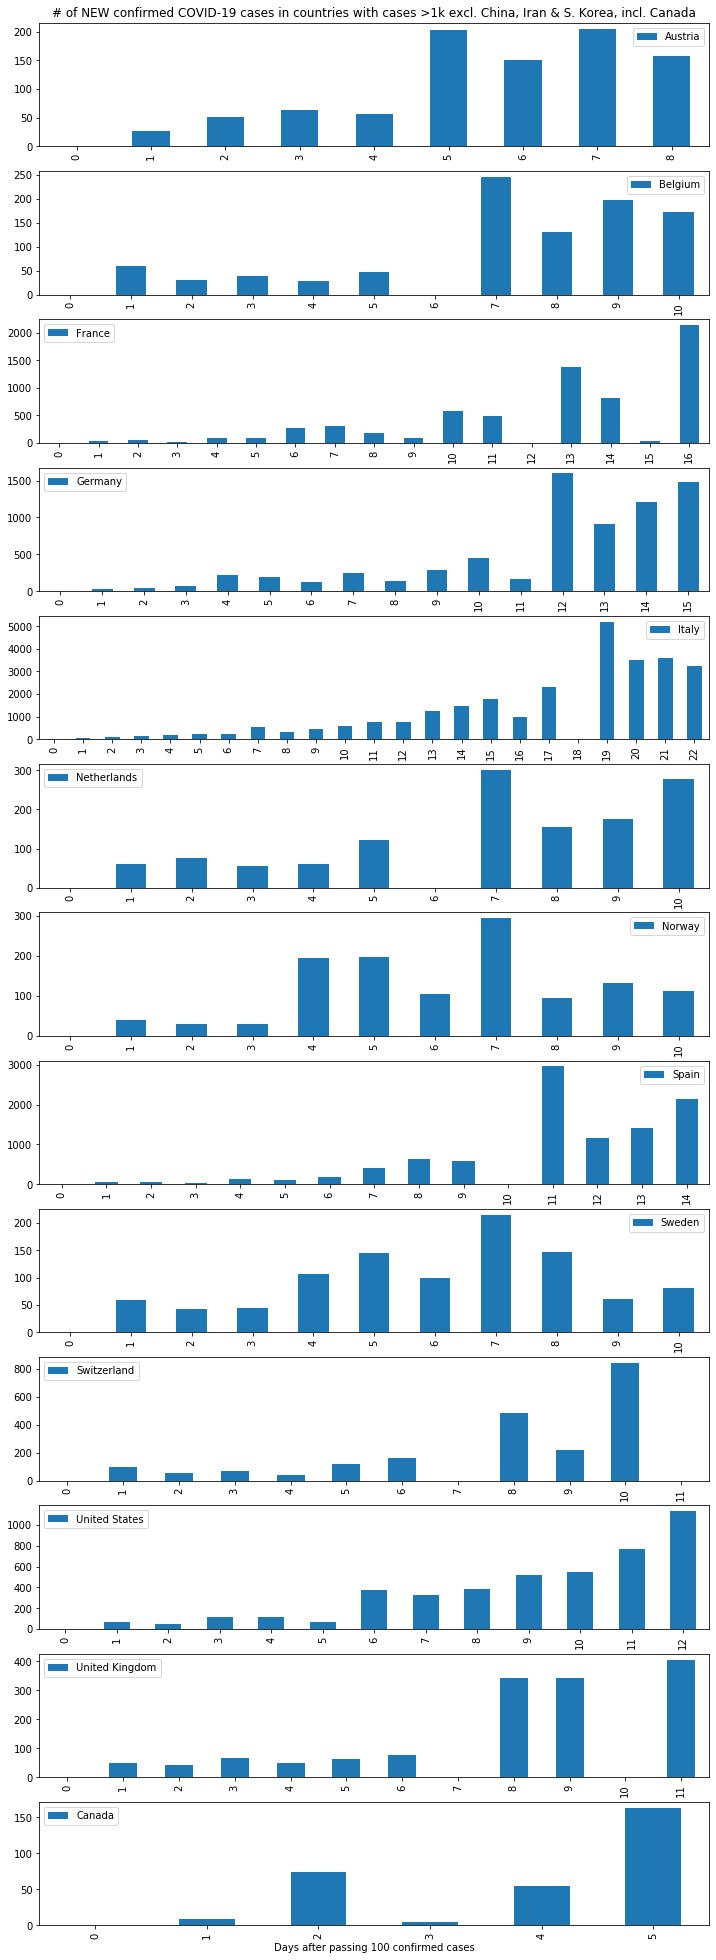

In [21]:
fig, axes = plt.subplots(len(data.keys()), figsize=(12, 35))

i = 0
for c in data.keys():
    data[c].diff().plot(ax=axes[i], kind="bar")
    axes[i].legend()
    i += 1

axes[0].set_title("# of NEW confirmed COVID-19 cases in " + title_name)
axes[-1].set_xlabel("Days after passing " + str(min_case_num) + " confirmed cases")

Austria
% Infected (today) 0.0115 %
% Infected (projected in 7 days) 0.1023 %
# Infected (today) / Total Population: 1018 / 8847037
# Infected (projected in 7 days) / Total Population: 9048 / 8847037
--
Belgium
% Infected (today) 0.0093 %
% Infected (projected in 7 days) 0.0853 %
# Infected (today) / Total Population: 1058 / 11422068
# Infected (projected in 7 days) / Total Population: 9742 / 11422068
--
France
% Infected (today) 0.0099 %
% Infected (projected in 7 days) 0.0717 %
# Infected (today) / Total Population: 6650 / 66987244
# Infected (projected in 7 days) / Total Population: 48003 / 66987244
--
Germany
% Infected (today) 0.0088 %
% Infected (projected in 7 days) 0.0852 %
# Infected (today) / Total Population: 7272 / 82927922
# Infected (projected in 7 days) / Total Population: 70634 / 82927922
--
Italy
% Infected (today) 0.0463 %
% Infected (projected in 7 days) 0.1959 %
# Infected (today) / Total Population: 27980 / 60431283
# Infected (projected in 7 days) / Total Populati

Text(0.5, 0, 'Days after passing 100 confirmed cases')

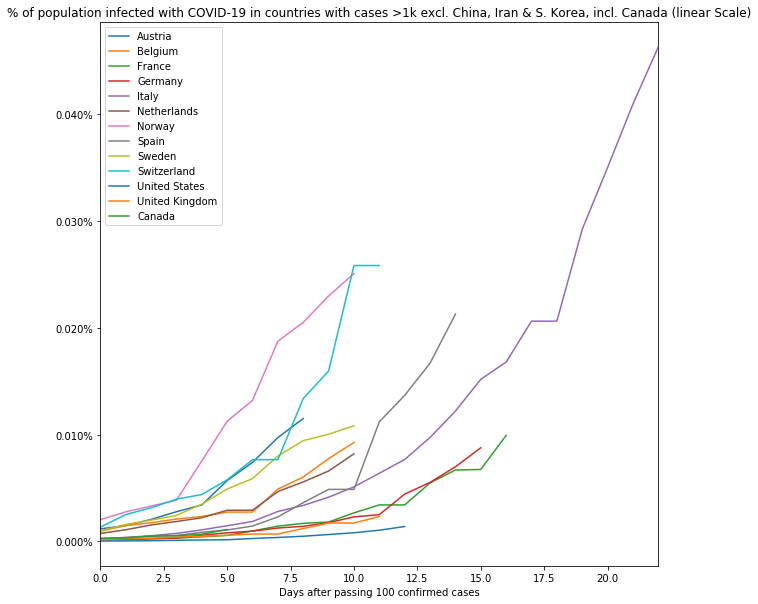

In [47]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for c in data.keys():
    size = pop[pop['Country'] == c]['SP.POP.TOTL']
    
    growth_rate = data[c].tail(5).pct_change().mean()
    num_cases = data[c].iloc[-1]
    
    projected_num_cases = int(num_cases*(1+growth_rate)**7)
    
    print(c)
    print('% Infected (today)', round(num_cases / int(size) * 100, 4), '%')
    print('% Infected (projected in 7 days)', round(projected_num_cases / int(size) * 100, 4), '%')
    print('# Infected (today) / Total Population:', int(num_cases),'/',int(size))
    print('# Infected (projected in 7 days) / Total Population:', int(projected_num_cases),'/',int(size))
    print('--')

    (data[c] / int(size) * 100.).plot()

axes.legend()
axes.yaxis.set_major_formatter(mtick.PercentFormatter())
axes.set_title("% of population infected with COVID-19 in " + title_name + " (linear Scale)")
axes.set_xlabel("Days after passing " + str(min_case_num) + " confirmed cases")

In [ ]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(8, 5))

for c in data.keys():
    data[c].plot()

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in " + title_name + " (Linear Scale)")
axes.set_xlabel("Days after passing " + str(min_case_num) + " confirmed cases")

In [ ]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(8, 5))

for s in data.keys():
    data_original[s].plot(logy=True)

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in " + title_name + " (Log Scale)")
axes.set_xlabel("Dates")

In [ ]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(8, 5))

for s in data.keys():
    data_original[s].plot()

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in " + title_name + " (Linear Scale)")
axes.set_xlabel("Dates")